#### 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2009.csv")
df


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429333,2009-12-31,YV,2846,YUM,PHX,615,605.0,-10.0,19.0,624.0,...,67.0,71.0,39.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN
6429334,2009-12-31,YV,2850,YUM,PHX,1929,1919.0,-10.0,7.0,1926.0,...,70.0,61.0,48.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN
6429335,2009-12-31,YV,2866,YUM,PHX,1400,1400.0,0.0,29.0,1429.0,...,55.0,70.0,32.0,160.0,0.0,0.0,15.0,0.0,0.0,NaN
6429336,2009-12-31,YV,2868,YUM,PHX,1620,1615.0,-5.0,10.0,1625.0,...,67.0,61.0,45.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape


(6429338, 28)

In [4]:
df.info

<bound method DataFrame.info of             FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0        2009-01-01         XE               1204    DCA  EWR          1100   
1        2009-01-01         XE               1206    EWR  IAD          1510   
2        2009-01-01         XE               1207    EWR  DCA          1100   
3        2009-01-01         XE               1208    DCA  EWR          1240   
4        2009-01-01         XE               1209    IAD  EWR          1715   
...             ...        ...                ...    ...  ...           ...   
6429333  2009-12-31         YV               2846    YUM  PHX           615   
6429334  2009-12-31         YV               2850    YUM  PHX          1929   
6429335  2009-12-31         YV               2866    YUM  PHX          1400   
6429336  2009-12-31         YV               2868    YUM  PHX          1620   
6429337  2009-12-31         YV               2871    YUM  PHX          1123   

         DEP_TIME  

In [5]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,6.429338e+06,6.429338e+06,6.346471e+06,6.346471e+06,6.343551e+06,6.343551e+06,6.340016e+06,6.340017e+06,6.429338e+06,6.340016e+06,...,6.429338e+06,6.326976e+06,6.326977e+06,6.429338e+06,1.170501e+06,1.170501e+06,1.170501e+06,1.170501e+06,1.170501e+06,0.0
mean,2.293712e+03,1.319447e+03,1.326026e+03,7.598179e+00,1.603613e+01,1.350798e+03,1.478506e+03,6.894225e+00,1.496722e+03,1.485662e+03,...,1.293446e+02,1.262434e+02,1.033257e+02,7.249700e+02,1.546616e+01,2.755585e+00,1.644337e+01,6.408282e-02,1.953755e+01,NaN
std,2.046497e+03,4.577529e+02,4.688940e+02,3.176494e+01,1.056383e+01,4.700515e+02,4.878461e+02,4.908826e+00,4.733178e+02,4.904066e+02,...,6.966364e+01,6.950774e+01,6.706977e+01,5.610229e+02,3.998500e+01,1.790554e+01,2.979917e+01,1.745892e+00,3.705886e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.400000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,6.180000e+02,9.260000e+02,9.280000e+02,-5.000000e+00,1.000000e+01,9.440000e+02,1.107000e+03,4.000000e+00,1.119000e+03,1.112000e+03,...,8.000000e+01,7.600000e+01,5.500000e+01,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1.629000e+03,1.315000e+03,1.322000e+03,-2.000000e+00,1.300000e+01,1.336000e+03,1.510000e+03,6.000000e+00,1.519000e+03,1.515000e+03,...,1.110000e+02,1.090000e+02,8.500000e+01,5.810000e+02,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,3.536000e+03,1.710000e+03,1.719000e+03,5.000000e+00,1.900000e+01,1.734000e+03,1.857000e+03,8.000000e+00,1.903000e+03,1.903000e+03,...,1.590000e+02,1.550000e+02,1.310000e+02,9.480000e+02,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.500000e+01,NaN
max,7.829000e+03,2.359000e+03,2.400000e+03,2.445000e+03,4.580000e+02,2.400000e+03,2.400000e+03,1.970000e+02,2.400000e+03,2.400000e+03,...,6.600000e+02,7.990000e+02,6.990000e+02,4.962000e+03,2.439000e+03,1.114000e+03,1.305000e+03,3.450000e+02,1.391000e+03,NaN


# **Visulization**

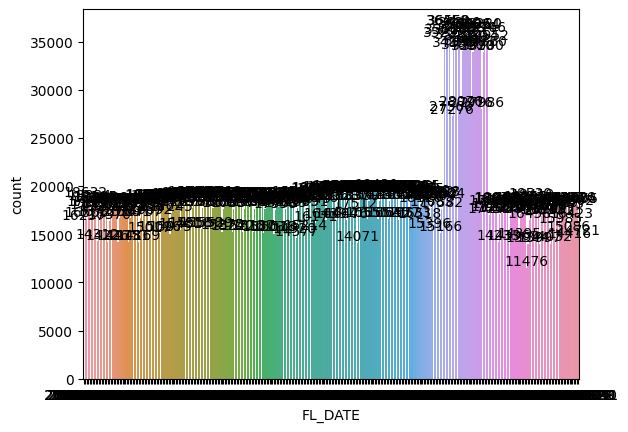

In [6]:
ax = sns.countplot(x = 'FL_DATE',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

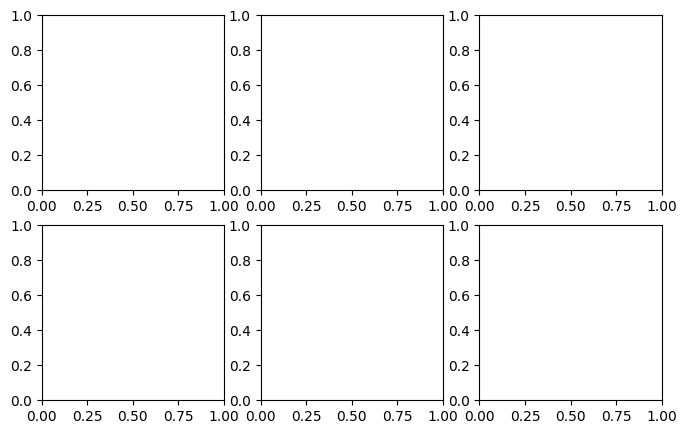

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

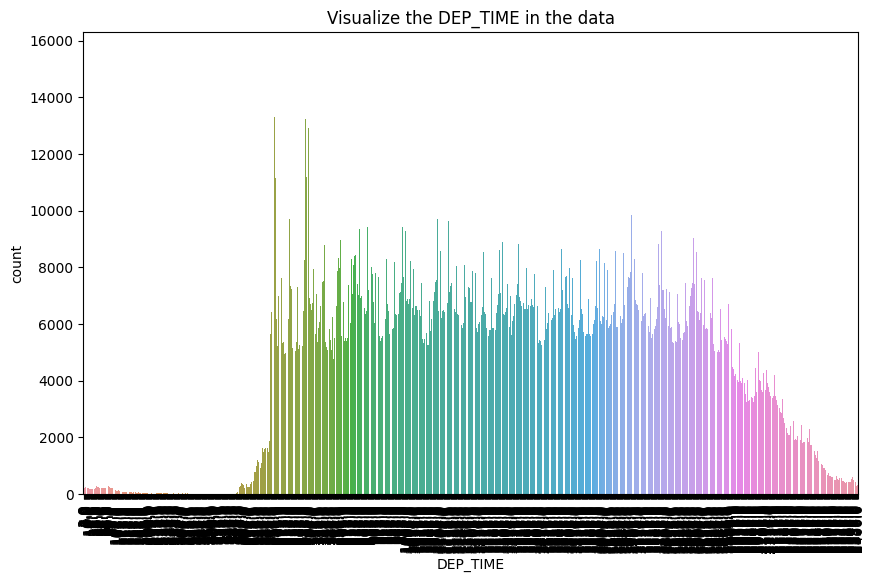

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['DEP_TIME'])
plt.title("Visualize the DEP_TIME in the data")
plt.xticks(rotation=90)
plt.show()

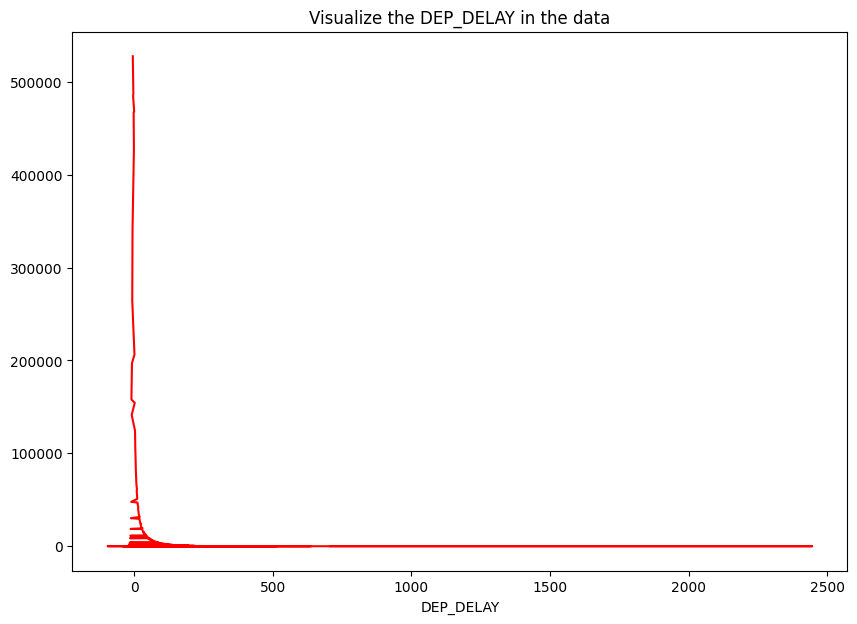

In [9]:
plt.figure(figsize=(10,7))
df['DEP_DELAY'].value_counts().plot(kind='line',color='red')
plt.title("Visualize the DEP_DELAY in the data")
plt.show()

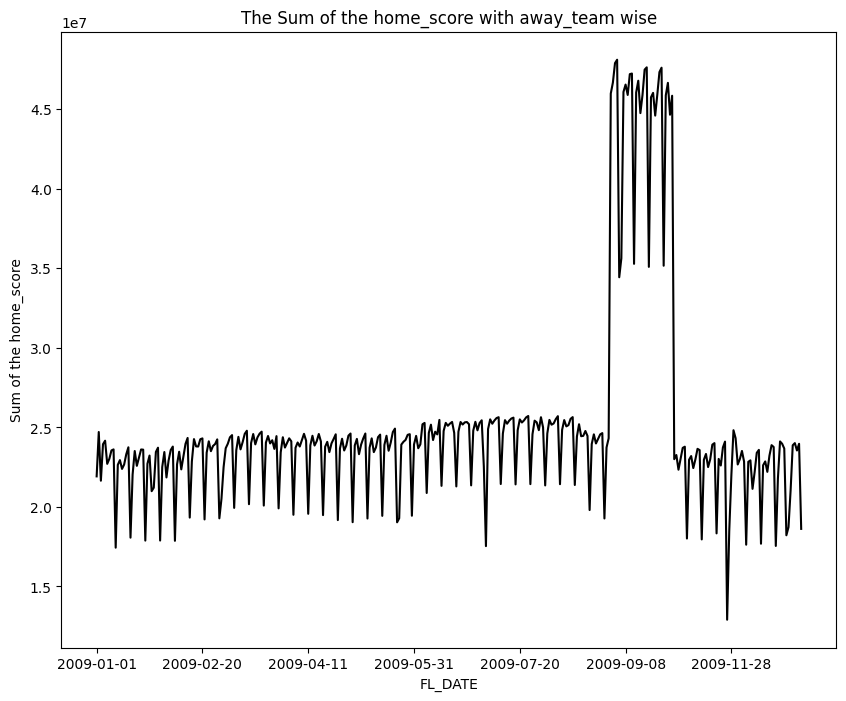

In [10]:
df.groupby('FL_DATE')['DEP_TIME'].sum()\
.plot(kind='line',color='black',figsize=(10,8))
plt.title("The Sum of the home_score with away_team wise")
plt.xlabel("FL_DATE")
plt.ylabel("Sum of the home_score")
plt.show()

# **Time Series**

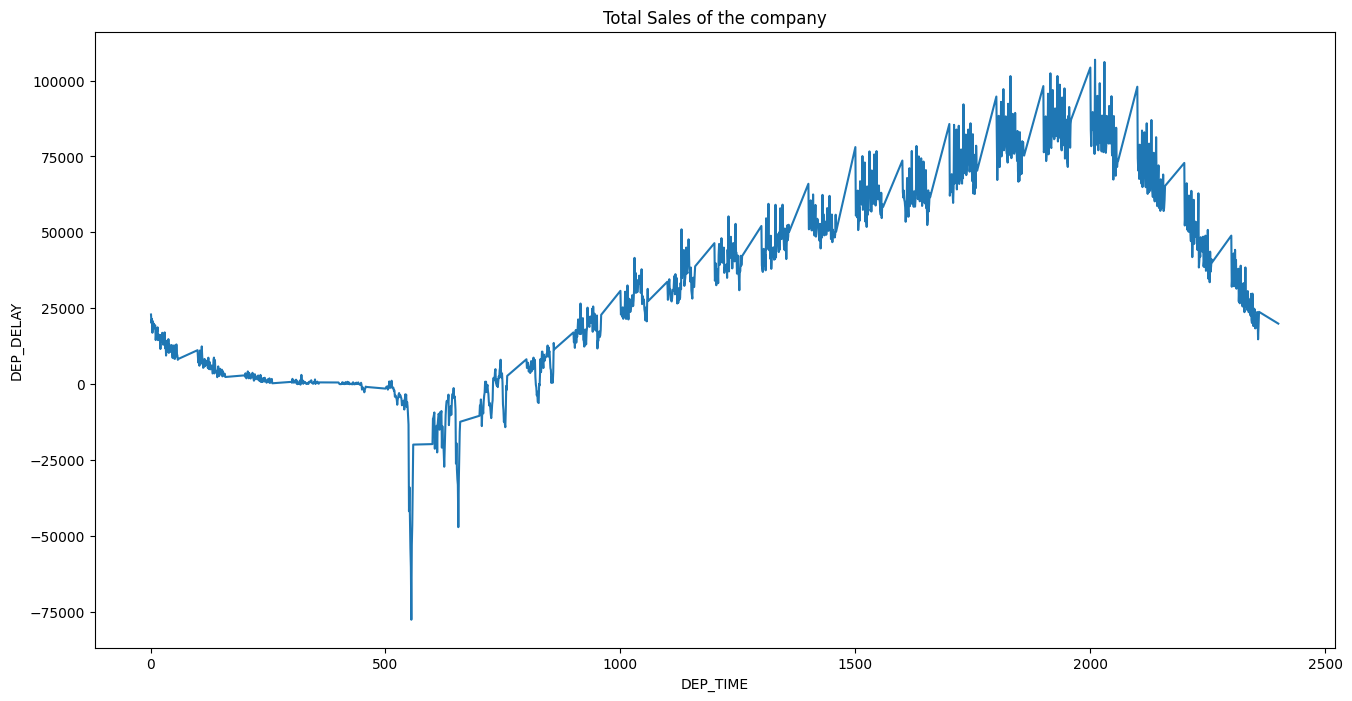

In [11]:
ts=df.groupby(["DEP_TIME"])["DEP_DELAY"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('DEP_TIME')
plt.ylabel('DEP_DELAY')
plt.plot(ts);

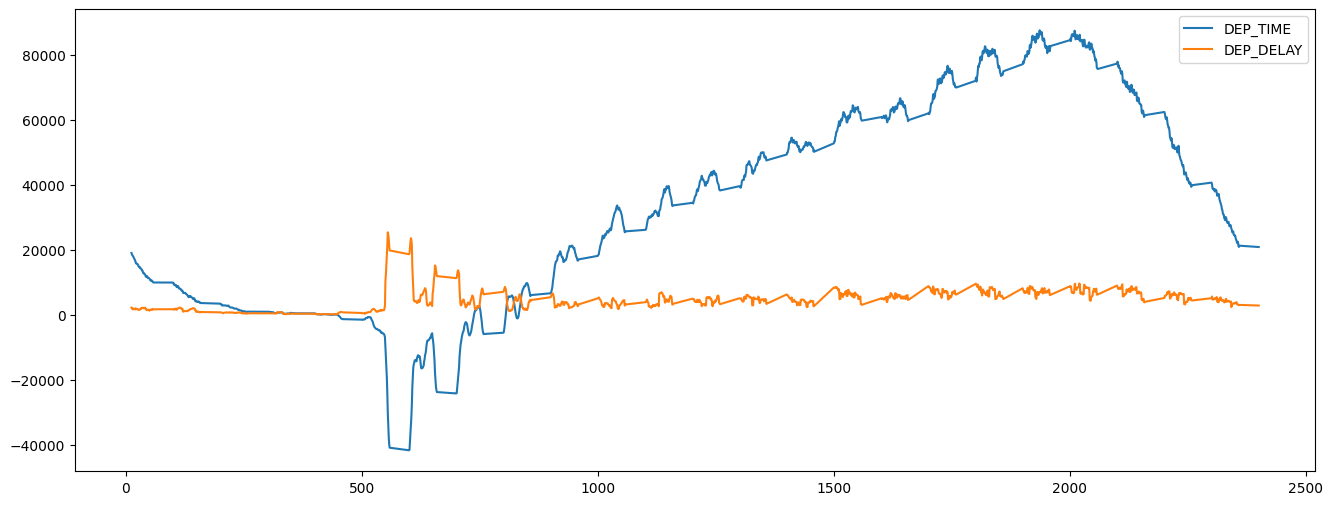

In [12]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='DEP_TIME');
plt.plot(ts.rolling(window=12,center=False).std(),label='DEP_DELAY');
plt.legend();